### 의사결정 나무 (결정트리) - 회귀분석




In [7]:
%matplotlib inline
import mglearn
import sklearn
from preamble import *

In [8]:
#!pip install graphviz
import graphviz

### 회귀분석에 활용
- 결정 트리를 회귀분석에 사용할 수 있다. 그런데 주의할 것은 훈련데이터로 주어진 샘플의 범위를 벗어나는 구간은 회귀분석을 할 수 없다 (extrapolation이 동작하지 않는다)

In [9]:
import pandas as pd

In [10]:
import os
ram_prices = pd.read_csv("data/ram_price.csv")

In [11]:
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
5,5,1973.00,3.99e+05
6,6,1974.00,3.15e+05
7,7,1975.00,4.22e+05
8,8,1975.08,1.80e+05
9,9,1975.25,6.76e+04


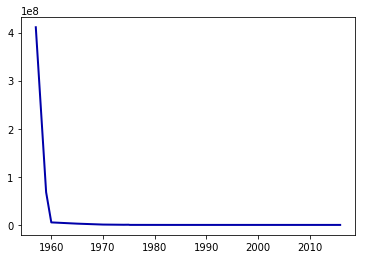

In [12]:
plt.plot(ram_prices.date, ram_prices.price)

Text(0,0.5,'가격 ($/Mbyte)')

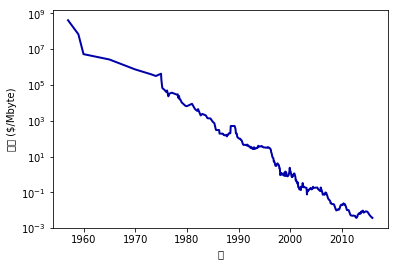

In [24]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

- 결정트리와 선형회귀 두가지 방법을 사용하여 회귀분석을 하겠다.
- 로그를 취한 후 대략 선형적인 형태를 가진다

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

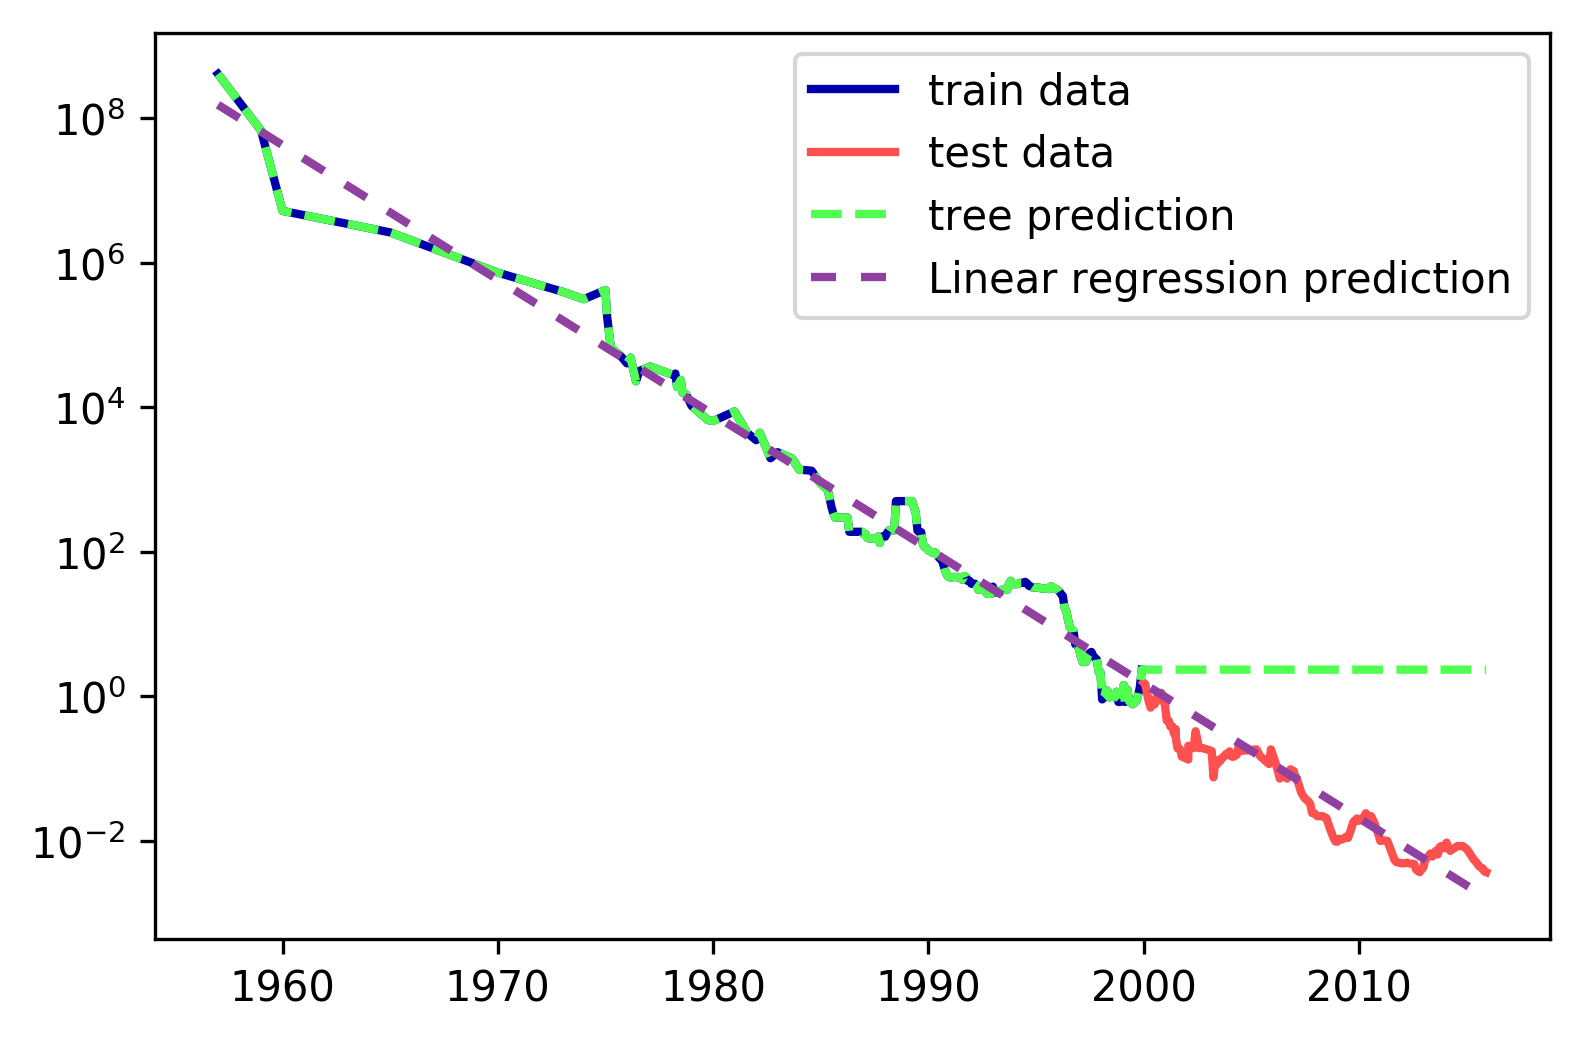

In [21]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear regression prediction")
plt.legend()

- 트리기반 회귀분석은 매우 정확하게 훈련데이터를 사용하여 예측하는 장점이 있으나, 주어진 범위 외부에 대해서는 동작하지 않는다.
- 수학점수와 과학점수 수학이 80점이면 과학이 75점일것이다. 
- 150점만점 시험의 경우? 선형회귀는 범위 바깥에 있는것도 예측을 할수 있음
- Scaling해서 손될수 있는가?

- 선형회귀는 직선으로 동작하지만 주어진 훈련데이터 밖의 범위에 대해서도 동작한다 (확대 가능)

### 장단점과 파라미터
- 모델복잡도를 제어하는 매개변수에는 max_depth (트리의 최대깊이), max_leaf_nodes (리프노드의 최대개수), min-samples_leaf(리프노드가 되기 위한 최대샘플개수), min_samples_split(노드가 분할하기 위한 최소샘플개수)등이 있다. 
- 모델의 시각화가 직관적이어서 설명하기에 좋다
- 데이터의 스케일에 영향을 받지 않으므로 정규화나 전처리가 필요없다
- 특성의 종류가 이진적이거나 연속값이거나 이들이 혼합되어 있어도 잘 동작한다
- 단점은 과대적합이 되는 경향이 있다
### 이를 해결하기 위해서 앙상블 방법이 사용된다